# Extract Foreign Language Text from an Image

In [ ]:
!sudo apt-get install  tesseract-ocr-spa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-spa is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!sudo apt install  tesseract-ocr

!pip install pytesseract



Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [1]:
#without this package, This show the error, AttributeError: module 'PIL.Image' has no attribute 'Resampling'
!pip install Pillow==9.0.0

In [3]:
import cv2
import pytesseract

!wget "https://www.seekpng.com/png/detail/251-2512082_download-free-quotes-life-isn-t-about-material.png"

--2022-04-13 14:55:12--  https://www.seekpng.com/png/detail/251-2512082_download-free-quotes-life-isn-t-about-material.png
Resolving www.seekpng.com (www.seekpng.com)... 208.110.80.76
Connecting to www.seekpng.com (www.seekpng.com)|208.110.80.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101361 (99K) [image/png]
Saving to: ‘251-2512082_download-free-quotes-life-isn-t-about-material.png.3’

251-2512082_downloa 100%[===================>]  98.99K   299KB/s    in 0.3s    

2022-04-13 14:55:13 (299 KB/s) - ‘251-2512082_download-free-quotes-life-isn-t-about-material.png.3’ saved [101361/101361]



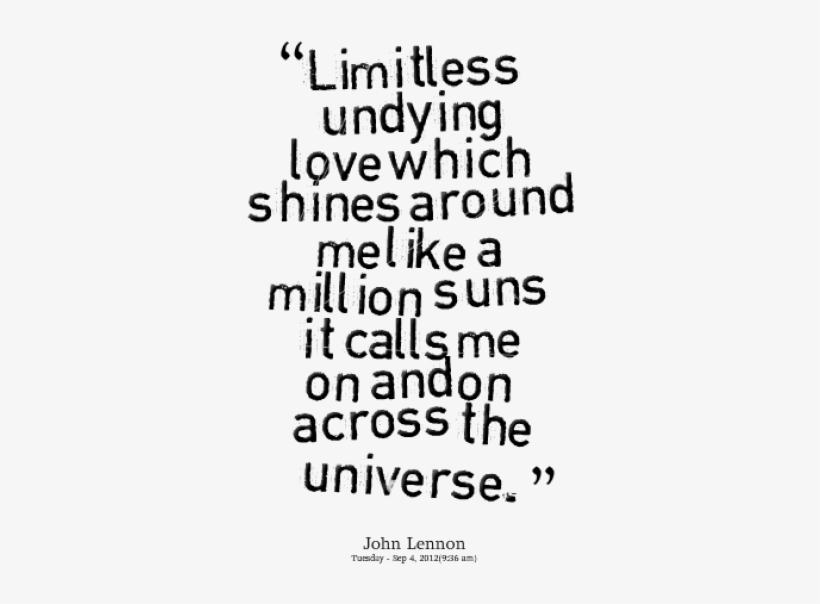

In [4]:
image = cv2.imread("251-2512082_download-free-quotes-life-isn-t-about-material.png")

from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [23]:
#if its a simple image with normal perspectives, it wil do the work but not if the picture from diffrent perspective.
text = pytesseract.image_to_string(image)

print(text)

AttributeError: ignored

In [ ]:
!wget "https://images.unsplash.com/photo-1582737971614-7b3cf1326f40?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80"

In [ ]:
#Lets take this image for example 
image = cv2.imread("photo-1582737971614-7b3cf1326f40?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=435&q=80")

from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [ ]:
#if its a simple image with normal perspectives, it wil do the work but not if the picture from diffrent perspective.
text = pytesseract.image_to_string(image)

print(text)

In [ ]:
!pip install plotly

import plotly.express as express

In [ ]:
#using plotly to get the coordinate where the text appear in the image
figure = express.imshow(image)

figure.show()
#then we need to define 4 points 

In [ ]:

point1_topleft = [74,170]
point2_bottomleft = [119,464]
point3_bottomright = [365,388]
point4_topright = [331,129]

import numpy 

input_points = numpy.float32([point1_topleft,point2_bottomleft,point3_bottomright,point4_topright])

height_1and2 = numpy.sqrt(((point1_topleft[0] - point2_bottomleft[0] ) ** 2) + ((point1_topleft[1] - point2_bottomleft[1]) ** 2))
height_3and4 = numpy.sqrt(((point3_bottomright[0] - point4_topright[0] ) ** 2) + ((point3_bottomright[1] - point4_topright[1]) ** 2))

max_height = max(int(height_1and2),int(height_3and4))

width_1and4 = numpy.sqrt(((point1_topleft[0] - point4_topright[0]) ** 2) + ((point1_topleft[1] - point4_topright[1]) ** 2))
width_2and3 = numpy.sqrt(((point2_bottomleft[0]  - point3_bottomright[0]) ** 2) + ((point2_bottomleft[1] - point3_bottomright[1]) ** 2))


max_width = max(int(width_1and4),int(width_2and3))

output_point = numpy.float32([[0,0],[0,max_height - 1],[max_width - 1,max_height - 1],[max_width - 1,0]])
 
matrix = cv2.getPerspectiveTransform(input_points, output_point) 

In [ ]:
warped_image = cv2.warpPerspective(image, matrix, (max_width,max_height),flags=cv2.INTER_LINEAR)

cv2_imshow(warped_image)

In [ ]:
text = pytesseract.image_to_string(warped_image)

print(text)

# Improve Accuracy with Thresholding
 

**Extract Text From Image with Tesseract**  

In [ ]:
!wget "https://storage.needpix.com/rsynced_images/tea-1702636_1280.jpg"

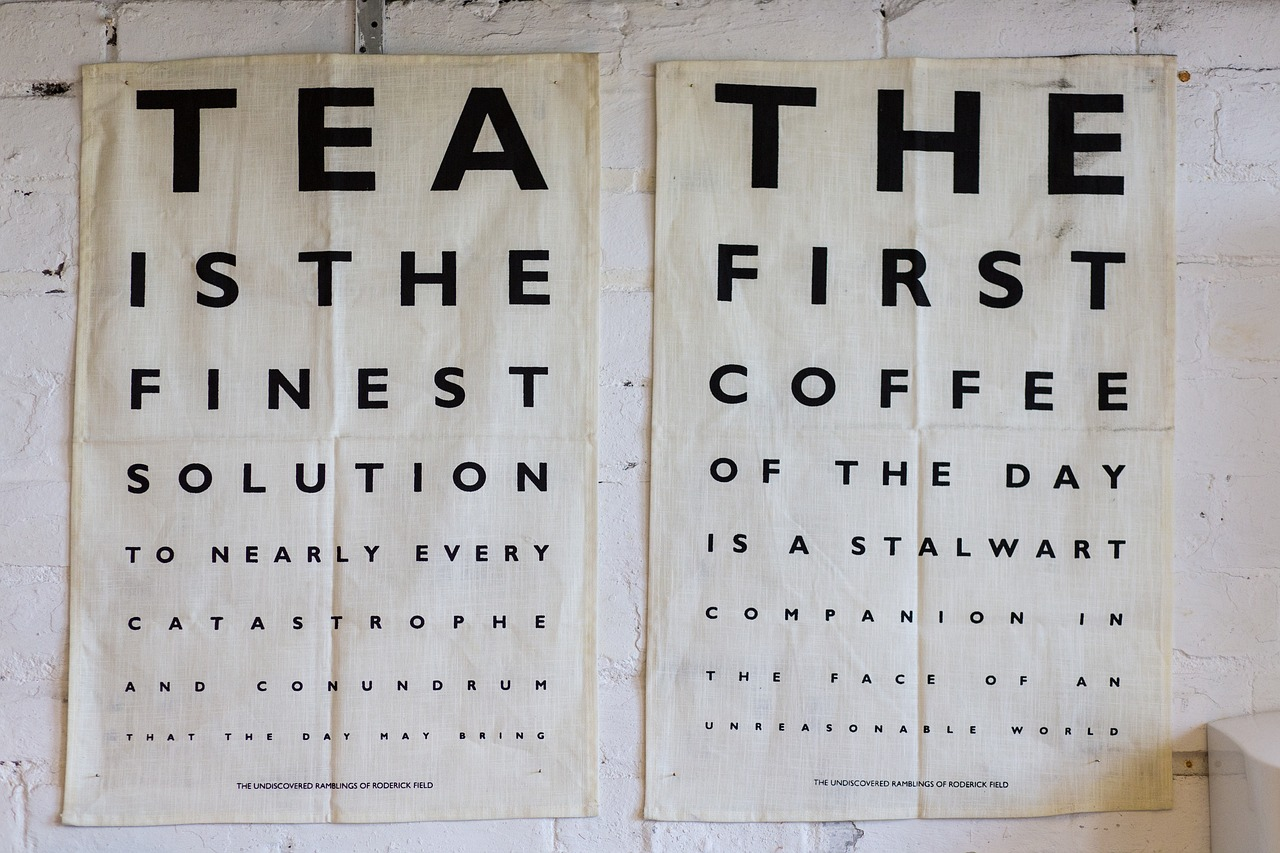

In [10]:
image = cv2.imread("tea-1702636_1280.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [14]:
text = pytesseract.image_to_string(image)
print(text)

 

 

“TEA |THE
“1S THE FIRST

FINEST + COFFEE
SOLUTION 7 OF THE DAY

| TO NEARLY EVERY 1S A STALWART

 

cr Ay tT Als BGR! 0, P, .H. JE CLO MP A NEDO) CINIR SRN

it
AND) 9c OC Mm UN oO [RU iM ane Faw ¢ fe oF AN
BOs ct bes fH aly Sunftunce fom). Be Ua SN 8 MEAN sho. Na Bae je) ji wi goin gree
© 4 UNDISCOVERED RAMBLINGS OF RODERICK FELD TH UNDISCOVERED RAMBLINGS OF RODERICK RELD u ‘

 

 



In [15]:
 #this will draw box for each letters found in the image and give you the coordinate
 boxes = pytesseract.image_to_boxes(image)
 print(boxes)

~ 133 783 136 853 0
~ 389 795 570 802 0
“ 24 655 115 790 0
T 126 660 232 853 0
E 298 661 375 853 0
A 413 662 585 853 0
| 579 645 680 851 0
T 691 664 817 853 0
H 877 659 965 853 0
E 1005 658 1272 853 0
“ 42 560 65 591 0
1 131 546 146 601 0
S 192 545 239 601 0
T 298 547 352 602 0
H 401 547 443 602 0
E 509 548 550 603 0
F 717 551 758 609 0
I 811 549 827 606 0
R 882 546 924 604 0
S 978 545 1008 603 0
T 1056 543 1125 624 0
F 131 444 160 484 0
I 208 443 219 484 0
N 268 444 310 484 0
E 358 444 388 485 0
S 434 445 463 486 0
T 509 446 548 486 0
+ 624 467 631 471 0
C 709 449 747 489 0
O 791 447 836 486 0
F 881 445 906 484 0
F 953 444 972 482 0
E 972 444 979 482 0
E 1035 442 1127 482 0
S 127 359 149 389 0
O 179 360 212 390 0
L 243 360 266 390 0
U 296 360 324 390 0
T 355 361 376 390 0
I 414 361 422 390 0
O 453 361 482 391 0
N 517 362 547 390 0
7 599 370 636 390 0
O 710 371 735 395 0
F 763 370 780 394 0
T 835 368 854 392 0
H 854 368 858 392 0
E 893 367 950 392 0
D 1006 365 1022 389 0
A 1053 364 106

In [17]:
height,width, colors = image.shape

In [21]:
color = (255,255,0)
thickness = 2

for box in boxes.splitlines():
  box = box.split(' ')
  start_x = int(box[1]) #if box[0] it will show letters, but we want the first coordinate so box[1]. Box is a split of array of boxes.
             #eg : Y 364 291 379 307 0 to "Y" "364" "291" "379" "307" "0"
  start_y = height - int(box[2])
  end_x = int(box[3])
  end_y = height - int(box[4])
  cv2.rectangle(image,(start_x,start_y),(end_x,end_y),color,thickness)


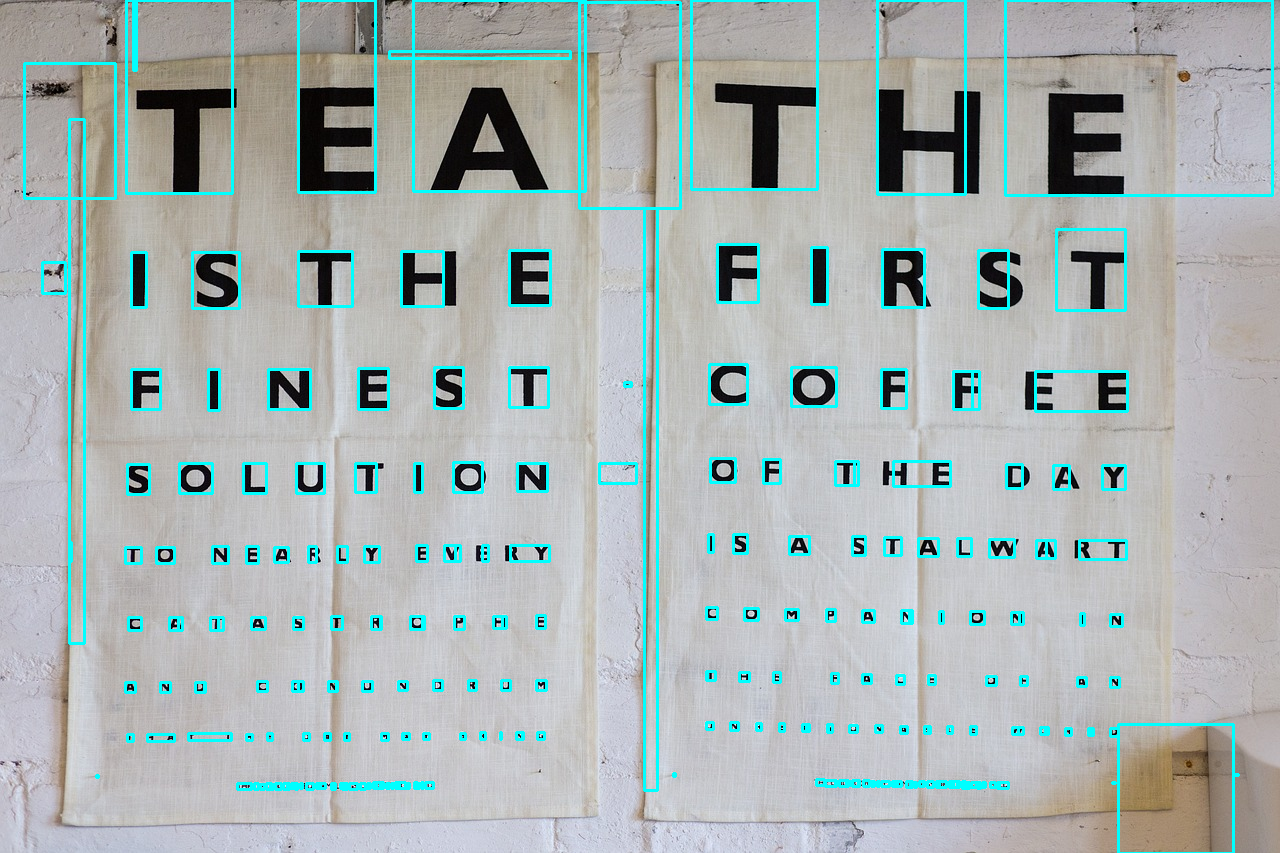

In [22]:
cv2_imshow(image)

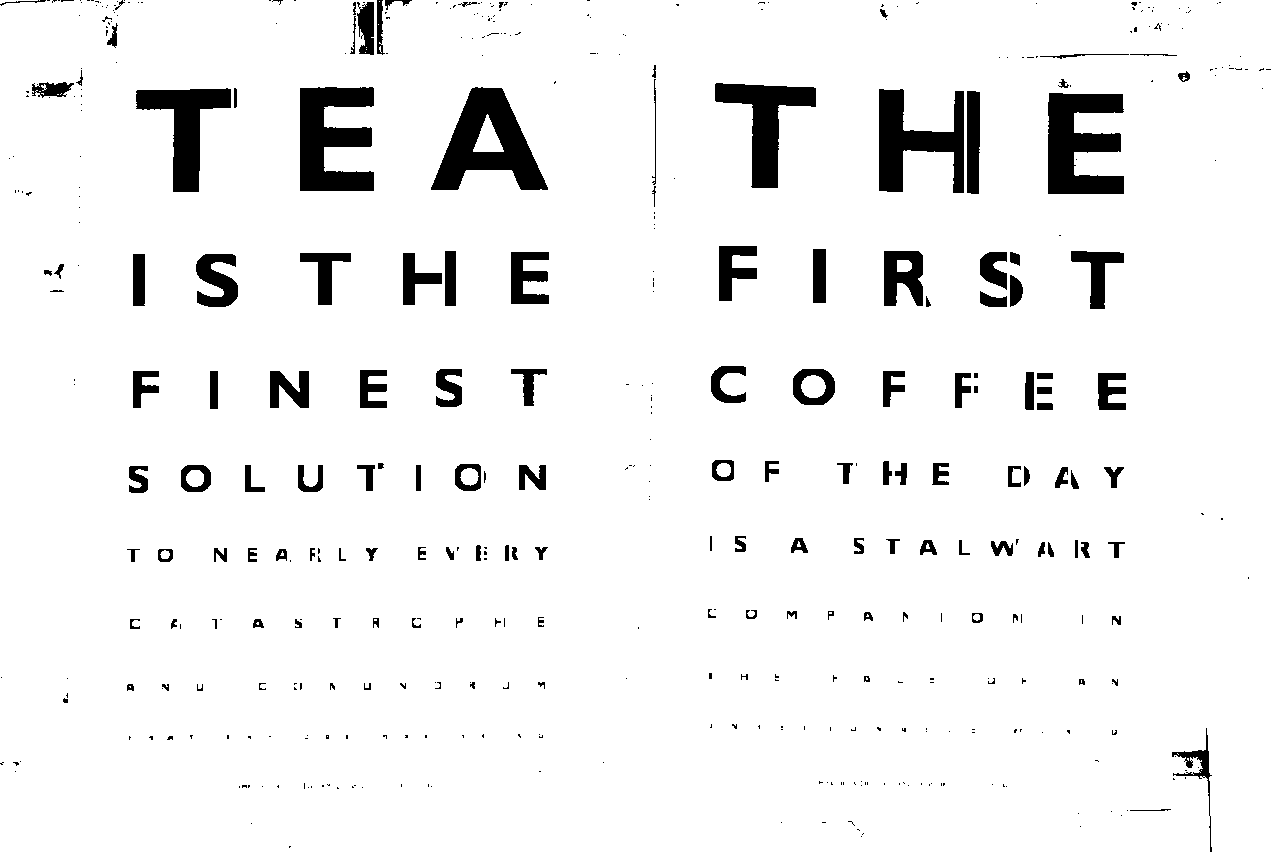

In [27]:




gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#threshold = cv2.threshold(gray_image , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

threshold = cv2.threshold(gray_image , 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cv2_imshow(threshold)

In [28]:
text = pytesseract.image_to_string(gray_image)
print(text)

aon
+ ye

“TEA THE

Bed HE 4 FR &'T
FINEST + COFFEE

SOLUTION A OF THE DAY
TO NEARLY EVERY 1S A STALWART
BOG ee afi 0 8

a iyo oe oS eh G, B, a, 6

Go Oo 8 8 8c o

